# Week 7: Nonlinear relationships

## Charlie Eaton

Human capital theorists argue that higher incomes are caused by investment in human capital (i.e. education).

Other sociologists argue that income is influenced by gender and racial discrimination in the labor market.
 
We will test these theories with OLS multiple regression models using data from the General Social Survey 2018.

## Read the data in and describe to see what variables we have

In [4]:
qui set more off
qui capture log close
log using w6lesson_log20200227.log
qui use realrinc age sex race educ yearsjob paeduc PASEI10 using GSS2018w.dta, clear
describe
summarize realrinc age sex race educ yearsjob paeduc





Contains data from GSS2018w7.dta
  obs:         2,348                          
 vars:             8                          26 Feb 2020 09:54
 size:        58,700                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
age             byte    %8.0g      AGE        Age of respondent
educ            byte    %8.0g      LABK       Highest year of school completed
paeduc          byte    %8.0g      LABK       Highest year school completed,
                                                father
sex             byte    %8.0g      SEX        Respondents sex
race            byte    %8.0g      RACE       Race of respondent
yearsjob        float   %9.0g      YEARSJOB   Time at current job
realrinc        double  %12.0g     LABIH      R's income in constant $
PA

In [14]:
%head if _n<=5

,age,educ,paeduc,sex,race,yearsjob,realrinc,PASEI10
1,43,14,12,male,white,1,IAP,58.4
2,74,10,0,female,white,.i,IAP,24.6
3,42,16,12,male,white,15,45400,77.40000000000001
4,63,16,16,female,white,25,54480,67.7
5,71,18,12,male,black,.i,IAP,58.4


## What do you think the variables measure?

1. What is the dependent variable: **realinc** or **income**

2. Which variables measure causes of income variation suggested by human capital theory: **education** or **educ** **years in job**

3. Which variables measure causes suggested by theories of labor market discrimination: **race** and **gender** 

4. Which variables control for other factors: **fathers education** might measure social resources passed down rather than skill gain from investment. **age** older people people make more. more experience, more time to get promoted. **fathers's occupation i.e. SES (socio-economic status**

Other theory? **class reproduction** - class discrimination

## Develop hypotheses using variables from the data

With your neighbor, make at least 1 hypothesis for each theory that includes an intervening or spurious relationship involving more than 1 independent variable

## Now, let's examine our dependent variable using histogram

In [21]:
%set graph_format svg

(bin=31, start=227, width=4865.2813)


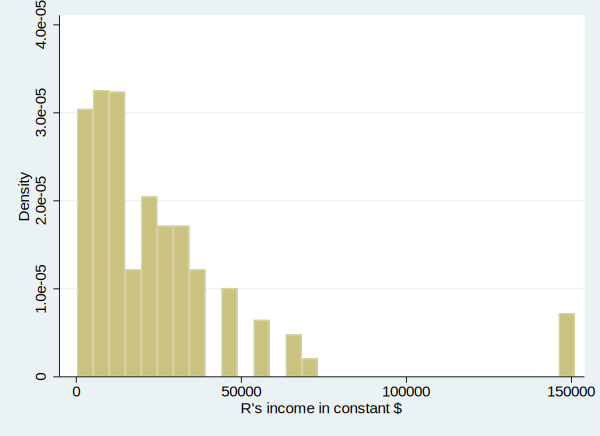

In [22]:
histogram realrinc

## Then, let's take a look at the relationships between our DV and IVs.

Let's generate scatter plots between our DV and appropriate IVs

In [25]:
foreach x in age sex race educ yearsjob paeduc PASEI10 {
quietly  graph twoway (scatter realrinc `x') (lfit realrinc `x', color(red)), ///
    name(`x', replace) legend(off) ytitle(income) scheme(plotplainblind)
}

### FYI, we can visualize these plots in one space. For instance,

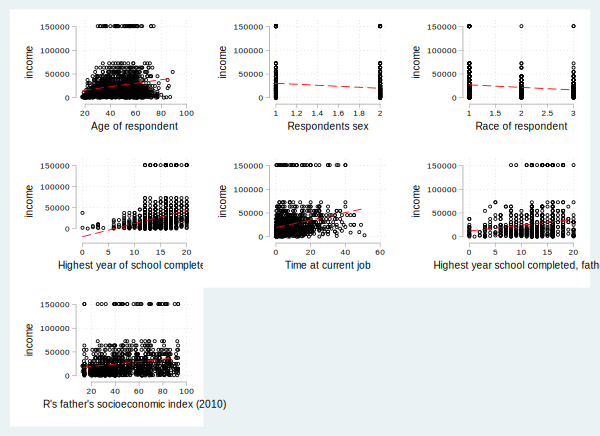

In [26]:
graph combine age sex race educ yearsjob paeduc PASEI10, col(3) 

## What do you think the numeric values represent for sex and race?

write some code to find out

In [ ]:
codebook sex race

You may want to run correlation analysis to see the linear relationship among variables

In [35]:
pwcorr realrinc age sex race educ paeduc yearsjob,  


             | realrinc      age      sex     race     educ   paeduc yearsjob
-------------+---------------------------------------------------------------
    realrinc |   1.0000 
         age |   0.1825   1.0000 
         sex |  -0.1830  -0.0142   1.0000 
        race |  -0.1297  -0.1448   0.0068   1.0000 
        educ |   0.3081  -0.0230   0.0118  -0.1471   1.0000 
      paeduc |   0.1557  -0.2686  -0.0264  -0.1937   0.4129   1.0000 
    yearsjob |   0.2610   0.4823  -0.0953  -0.0716   0.0907  -0.0363   1.0000 


### Why do you think we get "1.0000" across the diagonal?

### Should we change any of our hypotheses based on the correlation matrix?

## OLS multiple regression accounts for correlations between IVs

Here is the extension of the regression equation to multpiple regression:

$\hat{Y} = \alpha + \beta \times x $

$\hat{Y} = \alpha + \beta_1 \cdot x_1 + \beta_2 \cdot x_2. ... + \beta_k \cdot x_K $

$x_1$ is 1st independent variable

$x_2$ is 2nd indepdent variable

K is the number of independent variables

### Write a multiple regression equation in LaTex

Cut and paste LaTex code from the above cell.

Include all of the 6 independent variables.

Label each independent variable with a subscript with the first 1 or 2 letters for the variable.

### Write the regression equation in Stata and estimate the model

Replace the numbers for X and for beta with the first initial of the variables you want to include.

In [36]:
reg realrinc i.sex i.race educ yearsjob paeduc PASEI10


      Source |       SS           df       MS      Number of obs   =       887
-------------+----------------------------------   F(7, 879)       =     25.60
       Model |  1.3369e+11         7  1.9099e+10   Prob > F        =    0.0000
    Residual |  6.5568e+11       879   745943577   R-squared       =    0.1694
-------------+----------------------------------   Adj R-squared   =    0.1627
       Total |  7.8937e+11       886   890941929   Root MSE        =     27312

------------------------------------------------------------------------------
    realrinc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         sex |
     female  |  -9881.842     1850.8    -5.34   0.000    -13514.34    -6249.34
             |
        race |
      black  |  -5070.159   2974.036    -1.70   0.089     -10907.2     766.881
      other  |   -1176.36   2938.997    -0.40   0.689    -6944.632    4591.911
     

## How would you interpret the coefficients?

[your answer here]

## Does this regression analysis really test our hypotheses?

How can we test if there are any of the intervening or spurious relationships we hypothesized?

Write two regression equations that together test one such hypothesis.

In [37]:
reg realrinc yearsjob
reg realrinc yearsjob i.sex i.race



      Source |       SS           df       MS      Number of obs   =     1,199
-------------+----------------------------------   F(1, 1197)      =     87.48
       Model |  6.5831e+10         1  6.5831e+10   Prob > F        =    0.0000
    Residual |  9.0083e+11     1,197   752571573   R-squared       =    0.0681
-------------+----------------------------------   Adj R-squared   =    0.0673
       Total |  9.6666e+11     1,198   806894458   Root MSE        =     27433

------------------------------------------------------------------------------
    realrinc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    yearsjob |    792.516   84.73551     9.35   0.000     626.2694    958.7627
       _cons |   19144.66   1066.174    17.96   0.000     17052.88    21236.44
------------------------------------------------------------------------------


      Source |       SS           df       MS  

## How would you interpret the coefficients of the two models together?

## It's way easier to interpret models together if we combine their results in 1 table

We use -eststo- with regress and -esttab- to do this.

In [43]:
est clear

quietly eststo: reg realrinc yearsjob
quietly eststo: reg realrinc yearsjob i.sex i.race

In [46]:
esttab, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2" "Model 3") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (yearsjob "job tenure" 2.sex "female" 2.race "black" 3.race "other race") noconstant


--------------------------------------------
                      (1)             (2)   
                  Model 1         Model 2   
                     b/se            b/se   
--------------------------------------------
job tenure        792.516***      714.511***
                 (84.736)        (83.722)   
female                          -9159.198***
                               (1567.305)   
black                           -7188.723***
                               (2149.240)   
other race                      -7468.568** 
                               (2386.742)   
--------------------------------------------
R-Sqaured           0.068           0.108   
N                1199.000        1199.000   
--------------------------------------------


In [ ]:
%html
esttab, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2" "Model 3") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (_cons "Constant" 2.sex "female" 2.race "black" 3.race "other race" ///
educ "years of schooling" yearsjob "job tenure" paeduc "father's education" ///
PASEI10 "father's socioeconomic index") html

In [ ]:
quietly esttab, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2" "Model 3") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (_cons "Constant" 2.sex "female" 2.race "black" 3.race "other race" ///
educ "years of schooling" yearsjob "job tenure" paeduc "father's education" ///
PASEI10 "father's socioeconomic index") rtf